In [1]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np
import pandas as pd
# fix random seed for reproducibility
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
dataset = pd.read_csv("/content/drive/My Drive/Python for ML-Mahesh Anand/prima-indians-diabetes.csv",names=colnames)

In [11]:
type(dataset)

pandas.core.frame.DataFrame

In [12]:
dataset.shape

(768, 9)

In [19]:
# split into input (X) and output (Y) variables
X = dataset.drop(["outcome","bp"],axis=1)
Y = dataset["outcome"]
Y.shape

(768,)

In [20]:
X.head()

,preg,glu,sft,ins,bmi,dpf,age
0,6,148,35,0,33.6,0.627,50
1,1,85,29,0,26.6,0.351,31
2,8,183,0,0,23.3,0.672,32
3,1,89,23,94,28.1,0.167,21
4,0,137,35,168,43.1,2.288,33


In [23]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# Fit the model
history=model.fit(X, Y, validation_split=0.25,epochs=50, batch_size=1)

Epoch 1/50
576/576 [==============================] - 2s 3ms/step - loss: 2.5953 - accuracy: 0.5764 - val_loss: 0.6978 - val_accuracy: 0.6510
Epoch 2/50
576/576 [==============================] - 1s 3ms/step - loss: 0.7252 - accuracy: 0.6597 - val_loss: 0.6739 - val_accuracy: 0.6406
Epoch 3/50
576/576 [==============================] - 2s 4ms/step - loss: 0.6653 - accuracy: 0.6580 - val_loss: 0.6585 - val_accuracy: 0.6406
Epoch 4/50
576/576 [==============================] - 3s 5ms/step - loss: 0.6624 - accuracy: 0.6545 - val_loss: 0.6567 - val_accuracy: 0.6406
Epoch 5/50
576/576 [==============================] - 2s 4ms/step - loss: 0.6438 - accuracy: 0.6615 - val_loss: 0.6517 - val_accuracy: 0.6406
Epoch 6/50
576/576 [==============================] - 2s 4ms/step - loss: 0.6439 - accuracy: 0.6493 - val_loss: 0.6786 - val_accuracy: 0.6406
Epoch 7/50
576/576 [==============================] - 1s 2ms/step - loss: 0.6379 - accuracy: 0.6632 - val_loss: 0.6466 - val_accuracy: 0.6406
Epoch 

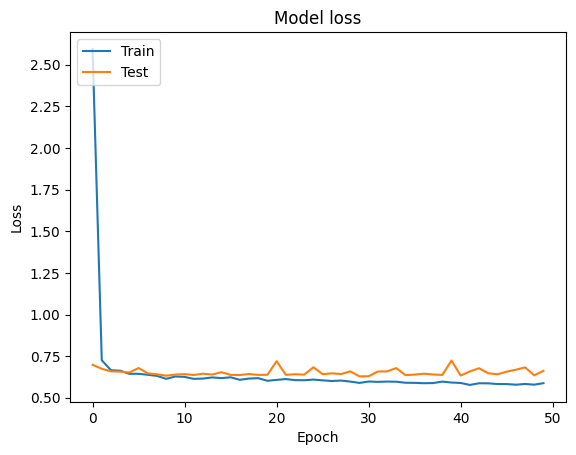

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

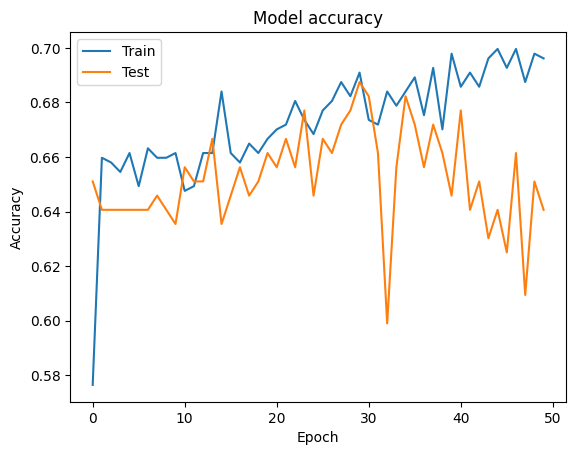

In [28]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the model
scores = model.evaluate(X, Y)
scores[1]*100

768/768 [==============================] - 0s 22us/step


78.64583333333334

In [ ]:
#Manual Validation
# MLP with manual validation set
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy
# fix random seed for reproducibility

numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)


Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 680us/step - loss: 4.3936 - acc: 0.5759 - val_loss: 0.6851 - val_acc: 0.6339
Epoch 2/150
514/514 [==============================] - 0s 190us/step - loss: 0.6852 - acc: 0.6401 - val_loss: 0.6833 - val_acc: 0.6378
Epoch 3/150
514/514 [==============================] - 0s 189us/step - loss: 0.6724 - acc: 0.6576 - val_loss: 0.6755 - val_acc: 0.6378
Epoch 4/150
514/514 [==============================] - 0s 190us/step - loss: 0.6463 - acc: 0.6576 - val_loss: 0.6690 - val_acc: 0.6378
Epoch 5/150
514/514 [==============================] - 0s 189us/step - loss: 0.6234 - acc: 0.6576 - val_loss: 0.6335 - val_acc: 0.6378
Epoch 6/150
514/514 [==============================] - 0s 190us/step - loss: 0.6323 - acc: 0.6576 - val_loss: 0.6438 - val_acc: 0.6378
Epoch 7/150
514/514 [==============================] - 0s 190us/step - loss: 0.6482 - acc: 0.6518 - val_loss: 0.6300 - val_acc: 0.6378
Epoch 8/1

Epoch 61/150
514/514 [==============================] - 0s 193us/step - loss: 0.5758 - acc: 0.6829 - val_loss: 0.6283 - val_acc: 0.6417
Epoch 62/150
514/514 [==============================] - 0s 188us/step - loss: 0.5700 - acc: 0.6829 - val_loss: 0.6336 - val_acc: 0.6260
Epoch 63/150
514/514 [==============================] - 0s 192us/step - loss: 0.5709 - acc: 0.6868 - val_loss: 0.6486 - val_acc: 0.6339
Epoch 64/150
514/514 [==============================] - 0s 190us/step - loss: 0.5696 - acc: 0.6946 - val_loss: 0.6465 - val_acc: 0.6299
Epoch 65/150
514/514 [==============================] - 0s 192us/step - loss: 0.5759 - acc: 0.6829 - val_loss: 0.6410 - val_acc: 0.5906
Epoch 66/150
514/514 [==============================] - 0s 191us/step - loss: 0.5785 - acc: 0.6887 - val_loss: 0.6255 - val_acc: 0.6339
Epoch 67/150
514/514 [==============================] - 0s 191us/step - loss: 0.5701 - acc: 0.6829 - val_loss: 0.6212 - val_acc: 0.6299
Epoch 68/150
514/514 [==========================

Epoch 121/150
514/514 [==============================] - 0s 190us/step - loss: 0.5517 - acc: 0.6984 - val_loss: 0.6454 - val_acc: 0.6772
Epoch 122/150
514/514 [==============================] - 0s 193us/step - loss: 0.5576 - acc: 0.7004 - val_loss: 0.6130 - val_acc: 0.6378
Epoch 123/150
514/514 [==============================] - 0s 188us/step - loss: 0.5562 - acc: 0.7101 - val_loss: 0.6391 - val_acc: 0.6811
Epoch 124/150
514/514 [==============================] - 0s 189us/step - loss: 0.5509 - acc: 0.7160 - val_loss: 0.6363 - val_acc: 0.6457
Epoch 125/150
514/514 [==============================] - 0s 191us/step - loss: 0.5417 - acc: 0.7043 - val_loss: 0.6400 - val_acc: 0.6693
Epoch 126/150
514/514 [==============================] - 0s 205us/step - loss: 0.5596 - acc: 0.7062 - val_loss: 0.6471 - val_acc: 0.6575
Epoch 127/150
514/514 [==============================] - 0s 203us/step - loss: 0.5584 - acc: 0.6965 - val_loss: 0.6311 - val_acc: 0.6260
Epoch 128/150
514/514 [==================

In [ ]:
#K-fold Cross-Validation
# MLP for Pima Indians Dataset with 10-fold cross validation
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/My Drive/pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model.fit(X[train], Y[train], epochs=150, batch_size=1, verbose=0)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


acc: 64.94%
acc: 79.22%
acc: 68.83%
acc: 83.12%
acc: 76.62%
acc: 64.94%
acc: 64.94%


In [ ]:
#Validate with Auto Verification
model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)

Train on 537 samples, validate on 231 samples
Epoch 1/150
537/537 [==============================] - 0s 182us/step - loss: 0.4977 - acc: 0.7486 - val_loss: 0.5308 - val_acc: 0.7489
Epoch 2/150
537/537 [==============================] - 0s 182us/step - loss: 0.4966 - acc: 0.7709 - val_loss: 0.5375 - val_acc: 0.7489
Epoch 3/150
537/537 [==============================] - 0s 182us/step - loss: 0.4942 - acc: 0.7561 - val_loss: 0.5489 - val_acc: 0.7143
Epoch 4/150
537/537 [==============================] - 0s 182us/step - loss: 0.4971 - acc: 0.7542 - val_loss: 0.5224 - val_acc: 0.7359
Epoch 5/150
537/537 [==============================] - 0s 180us/step - loss: 0.4940 - acc: 0.7561 - val_loss: 0.5322 - val_acc: 0.7446
Epoch 6/150
537/537 [==============================] - 0s 182us/step - loss: 0.4891 - acc: 0.7672 - val_loss: 0.5345 - val_acc: 0.7446
Epoch 7/150
537/537 [==============================] - 0s 182us/step - loss: 0.4927 - acc: 0.7672 - val_loss: 0.5304 - val_acc: 0.7532
Epoch 8/1

Epoch 61/150
537/537 [==============================] - 0s 179us/step - loss: 0.4757 - acc: 0.7635 - val_loss: 0.5499 - val_acc: 0.7229
Epoch 62/150
537/537 [==============================] - 0s 182us/step - loss: 0.4783 - acc: 0.7784 - val_loss: 0.5303 - val_acc: 0.7316
Epoch 63/150
537/537 [==============================] - 0s 181us/step - loss: 0.4717 - acc: 0.7747 - val_loss: 0.5577 - val_acc: 0.7229
Epoch 64/150
537/537 [==============================] - 0s 180us/step - loss: 0.4764 - acc: 0.7914 - val_loss: 0.5515 - val_acc: 0.7273
Epoch 65/150
537/537 [==============================] - 0s 182us/step - loss: 0.4771 - acc: 0.7728 - val_loss: 0.5537 - val_acc: 0.7273
Epoch 66/150
537/537 [==============================] - 0s 180us/step - loss: 0.4710 - acc: 0.7877 - val_loss: 0.5490 - val_acc: 0.7229
Epoch 67/150
537/537 [==============================] - 0s 182us/step - loss: 0.4724 - acc: 0.7654 - val_loss: 0.5495 - val_acc: 0.7359
Epoch 68/150
537/537 [==========================

537/537 [==============================] - 0s 182us/step - loss: 0.4671 - acc: 0.7728 - val_loss: 0.5362 - val_acc: 0.7489
Epoch 122/150
537/537 [==============================] - 0s 181us/step - loss: 0.4700 - acc: 0.7765 - val_loss: 0.5286 - val_acc: 0.7316
Epoch 123/150
537/537 [==============================] - 0s 180us/step - loss: 0.4698 - acc: 0.7747 - val_loss: 0.5321 - val_acc: 0.7446
Epoch 124/150
537/537 [==============================] - 0s 182us/step - loss: 0.4611 - acc: 0.7747 - val_loss: 0.5361 - val_acc: 0.7403
Epoch 125/150
537/537 [==============================] - 0s 181us/step - loss: 0.4669 - acc: 0.7877 - val_loss: 0.5354 - val_acc: 0.7532
Epoch 126/150
537/537 [==============================] - 0s 181us/step - loss: 0.4655 - acc: 0.7784 - val_loss: 0.5631 - val_acc: 0.7446
Epoch 127/150
537/537 [==============================] - 0s 182us/step - loss: 0.4701 - acc: 0.7654 - val_loss: 0.5287 - val_acc: 0.7446
Epoch 128/150
537/537 [==============================] 

In [ ]:
#Manual Validation
# MLP with manual validation set
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy


In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)


In [ ]:
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)


In [ ]:
y_test.shape

(254, 2, 1)

In [ ]:
X_train=numpy.expand_dims(X_train,axis=2)
X_test=numpy.expand_dims(X_test,axis=2)



In [ ]:
X_train.shape

(514, 8, 1)

In [ ]:
X_train.shape[1]

8

In [ ]:
# create model
model = Sequential()
model.add(Conv1D(filters=2,kernel_size=3,input_shape=(X_train.shape[1],X_train.shape[2]),padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(12,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))


In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Fit the model
model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=10, batch_size=5)

Train on 514 samples, validate on 254 samples
Epoch 1/10
514/514 [==============================] - 1s 1ms/step - loss: 1.7226 - acc: 0.5029 - val_loss: 0.9124 - val_acc: 0.5650
Epoch 2/10
514/514 [==============================] - 0s 414us/step - loss: 0.7277 - acc: 0.5982 - val_loss: 0.6598 - val_acc: 0.6378
Epoch 3/10
514/514 [==============================] - 0s 429us/step - loss: 0.6528 - acc: 0.6449 - val_loss: 0.6353 - val_acc: 0.6437
Epoch 4/10
514/514 [==============================] - 0s 415us/step - loss: 0.6376 - acc: 0.6469 - val_loss: 0.6294 - val_acc: 0.6614
Epoch 5/10
514/514 [==============================] - 0s 457us/step - loss: 0.6283 - acc: 0.6644 - val_loss: 0.6254 - val_acc: 0.6673
Epoch 6/10
514/514 [==============================] - 0s 464us/step - loss: 0.6266 - acc: 0.6459 - val_loss: 0.6235 - val_acc: 0.6614
Epoch 7/10
514/514 [==============================] - 0s 423us/step - loss: 0.6197 - acc: 0.6634 - val_loss: 0.6264 - val_acc: 0.6732
Epoch 8/10
514/514

In [ ]:
model.predict(X_test)

In [ ]:
y_predict=model.predict_classes(X_test)

In [ ]:
metrics.accuracy_score(y_test,y_predict)

0.7047244094488189

In [ ]:
metrics.confusion_matrix(y_test,y_predict)

array([[127,  35],
       [ 40,  52]])

In [ ]:
cr=metrics.classification_report(y_test,y_predict)
print(cr)

             precision    recall  f1-score   support

        0.0       0.76      0.78      0.77       162
        1.0       0.60      0.57      0.58        92

avg / total       0.70      0.70      0.70       254

